In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# feel free to add more if you need

In [2]:
pd.set_option('display.max_columns', 50)

# load data
data_raw = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)?
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [3]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [4]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,Fan Shop,Pacific Asia,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,Fan Shop,Pacific Asia,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,Fan Shop,Pacific Asia,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,Fan Shop,Pacific Asia,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [5]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City',
               'Customer Country', 'Customer Email',
               'Customer Fname', 'Customer Lname',
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [6]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [7]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,-121.881279,19491,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,-118.291016,19490,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,-66.037048,19489,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,-73.942711,1005,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,-119.018700,9141,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,-72.967155,291,26024,1004,8.000000,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,-66.370575,2813,26022,1004,12.000000,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [8]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id',
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude',
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [9]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Check for duplicate observations

In [10]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [11]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [12]:
data_raw.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Customer Segment                 0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

Plot a correlation heatmap

<AxesSubplot:>

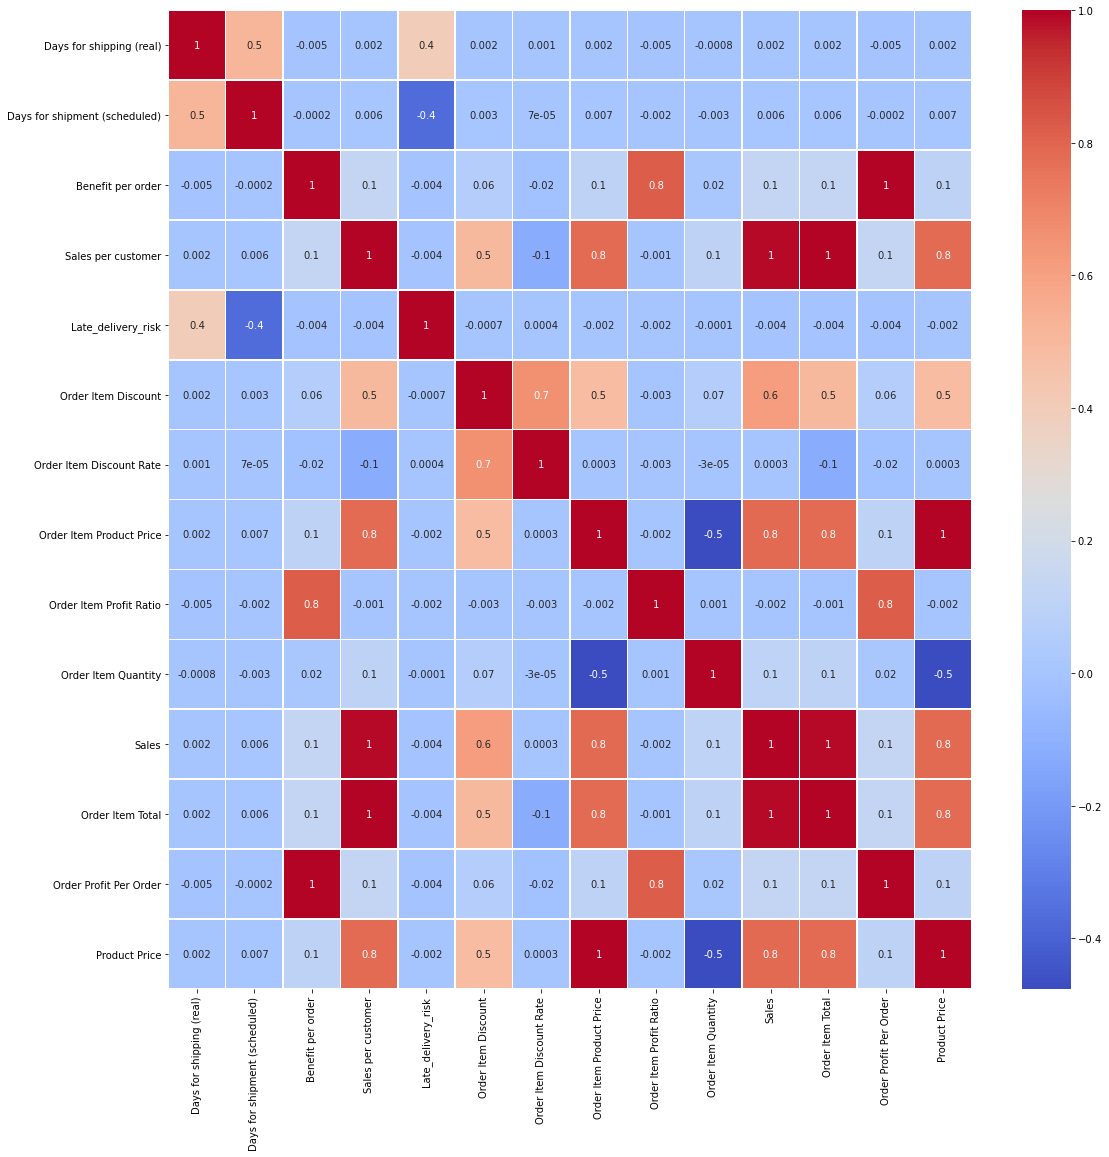

In [13]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [14]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

Detect / Remove / Replace Outliers (if any)

In [15]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<AxesSubplot:xlabel='value', ylabel='variable'>

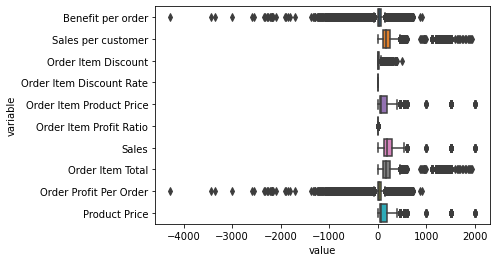

In [16]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [17]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [18]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [19]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr

In [20]:
ohe_data

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,Advance shipping,0,Consumer,1/31/2018 22:56,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,COMPLETE,327.750000,2/3/2018 22:56,0,1,0,0,0,0,0,1
1,5,4,-249.089996,311.359985,Late delivery,1,Consumer,1/13/2018 12:27,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,PENDING,327.750000,1/18/2018 12:27,0,0,0,1,0,0,0,1
2,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,1/13/2018 12:06,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,CLOSED,327.750000,1/17/2018 12:06,1,0,0,0,0,0,0,1
3,3,4,22.860001,304.809998,Advance shipping,0,Home Office,1/13/2018 11:45,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,COMPLETE,327.750000,1/16/2018 11:45,0,1,0,0,0,0,0,1
4,2,4,134.210007,298.250000,Advance shipping,0,Corporate,1/13/2018 11:24,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,PENDING_PAYMENT,327.750000,1/15/2018 11:24,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,Shipping on time,0,Home Office,1/16/2016 3:40,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,CLOSED,399.980011,1/20/2016 3:40,1,0,0,0,0,0,0,1
180515,3,2,31.520000,395.980011,Late delivery,1,Corporate,1/16/2016 1:34,4.000000,0.01,399.980011,0.27,1,399.980011,395.980011,31.520000,COMPLETE,399.980011,1/19/2016 1:34,0,1,0,0,0,0,1,0
180516,5,4,141.110001,391.980011,Late delivery,1,Corporate,1/15/2016 21:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,PENDING,399.980011,1/20/2016 21:00,0,0,0,1,0,0,0,1
180517,3,4,186.229996,387.980011,Advance shipping,0,Consumer,1/15/2016 20:18,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,PENDING_PAYMENT,399.980011,1/18/2016 20:18,0,0,1,0,0,0,0,1


In [21]:
# Convert date columns to datetime
ohe_data['order date (DateOrders)'] = pd.to_datetime(ohe_data['order date (DateOrders)'])
ohe_data['shipping date (DateOrders)'] = pd.to_datetime(ohe_data['shipping date (DateOrders)'])

# Engineered Feature 1: Average Customer Order Value
ohe_data['Average_Order_Value'] = ohe_data['Sales per customer'] / ohe_data.groupby('Customer Segment')['Order Item Quantity'].transform('count')

# Engineered Feature 2: Discount Impact (Discount Rate * Order Item Quantity)
ohe_data['Discount_Impact'] = ohe_data['Order Item Discount Rate'] * ohe_data['Order Item Quantity']

# Engineered Feature 3: Average Sales per Customer Segment
ohe_data['Avg_Sales_Segment'] = ohe_data.groupby('Customer Segment')['Sales'].transform('mean')

# Engineered Feature 4: Order Value per Quantity
ohe_data['Order_Value_per_Quantity'] = ohe_data['Sales'] / ohe_data['Order Item Quantity']

# Engineered Feature 6: Order Value to Quantity Ratio
ohe_data['Order_Value_to_Quantity_Ratio'] = ohe_data['Order Item Total'] / ohe_data['Order Item Quantity']

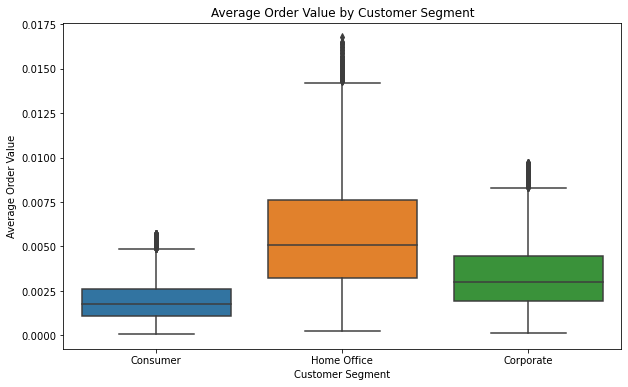

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Segment', y='Average_Order_Value', data=ohe_data)
plt.title("Average Order Value by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value")
plt.show()

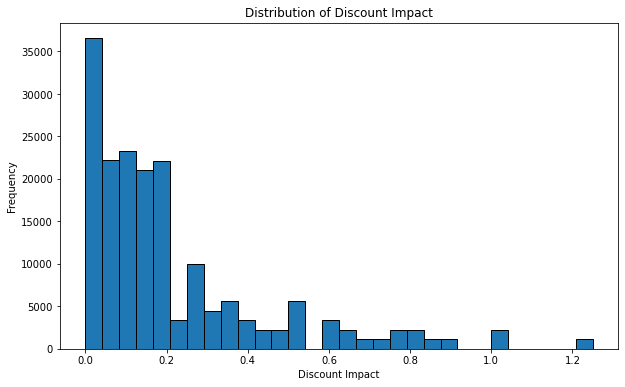

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(ohe_data['Discount_Impact'], bins=30, edgecolor='black')
plt.title("Distribution of Discount Impact")
plt.xlabel("Discount Impact")
plt.ylabel("Frequency")
plt.show()


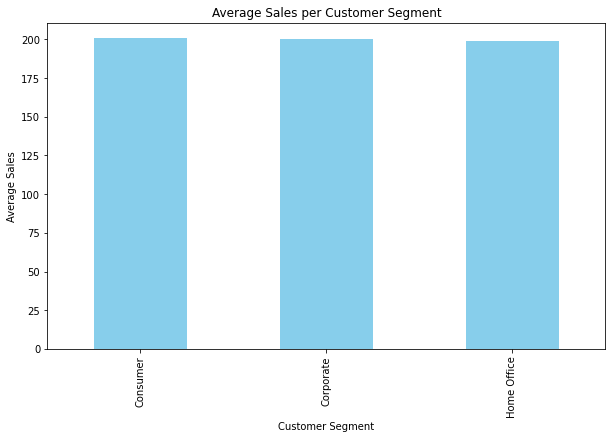

In [24]:
avg_sales_segment = ohe_data.groupby('Customer Segment')['Avg_Sales_Segment'].mean()
plt.figure(figsize=(10, 6))
avg_sales_segment.plot(kind='bar', color='skyblue')
plt.title("Average Sales per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Sales")
plt.show()


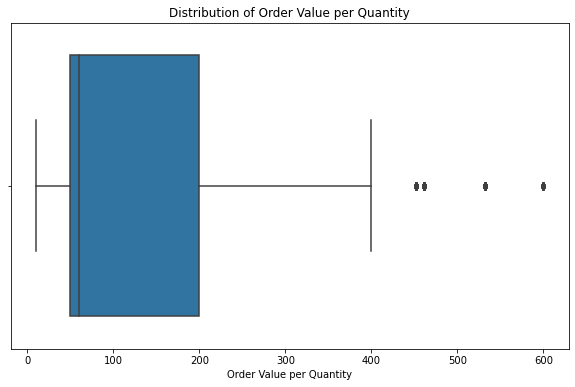

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ohe_data['Order_Value_per_Quantity'])
plt.title("Distribution of Order Value per Quantity")
plt.xlabel("Order Value per Quantity")
plt.show()

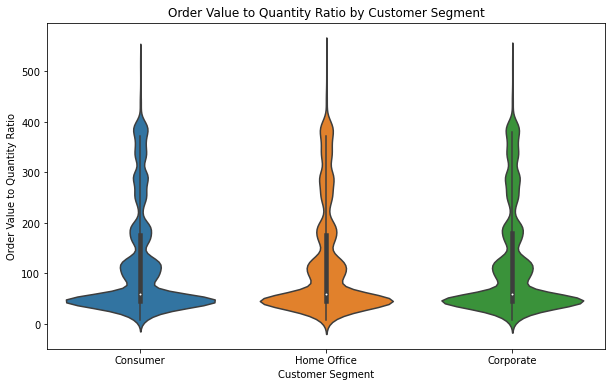

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Customer Segment', y='Order_Value_to_Quantity_Ratio', data=ohe_data)
plt.title("Order Value to Quantity Ratio by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Order Value to Quantity Ratio")
plt.show()

In [27]:
# Create binary target variable for late delivery (1 = late, 0 = on-time)
ohe_data['late_delivery'] = np.where(ohe_data['Days for shipping (real)'] > ohe_data['Days for shipment (scheduled)'], 1, 0)

# Select relevant features
features = [
    'Days for shipment (scheduled)',
    'Benefit per order',
    'Sales per customer',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Sales',
    'Order Item Total',
    'Order Profit Per Order',

    'Average_Order_Value',            # Engineered feature
    'Discount_Impact',                # Engineered feature
    'Avg_Sales_Segment',              # Engineered feature
    'Order_Value_per_Quantity',       # Engineered feature
    'Order_Value_to_Quantity_Ratio',  # Engineered feature
]

X = ohe_data[features]
y = ohe_data['late_delivery']

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Overall Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58     15399
           1       0.69      0.67      0.68     20705

    accuracy                           0.64     36104
   macro avg       0.63      0.63      0.63     36104
weighted avg       0.64      0.64      0.64     36104

Overall Accuracy: 0.6375470861954354


In [31]:
# Calculate expected claims for the testing set
expected_claims = y_pred.mean() * 100
fixed_expense = 10
profit_premium = 0.05  # Initial profit Premium (5%)

# Calculate the premium
premium = (expected_claims + fixed_expense) * (1 + profit_premium)

print(f"Expected Claims: ${expected_claims}")
print(f"Calculated Premium: ${premium}")


Expected Claims: $55.84145801019278
Calculated Premium: $69.13353091070242


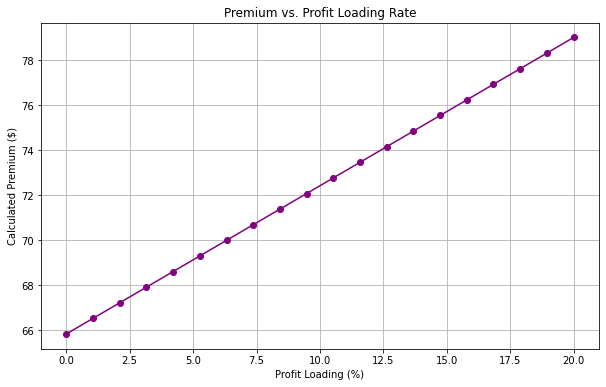

In [32]:
# 2. Line Chart for Premium vs. Profit Loading Rate
profit_rates = np.linspace(0, 0.2, 20)  # 0% to 20% profit premium
premiums = [(expected_claims + fixed_expense) * (1 + rate) for rate in profit_rates]

plt.figure(figsize=(10, 6))
plt.plot(profit_rates * 100, premiums, marker='o', color='purple')
plt.title('Premium vs. Profit Loading Rate')
plt.xlabel('Profit Loading (%)')
plt.ylabel('Calculated Premium ($)')
plt.grid()
plt.show()

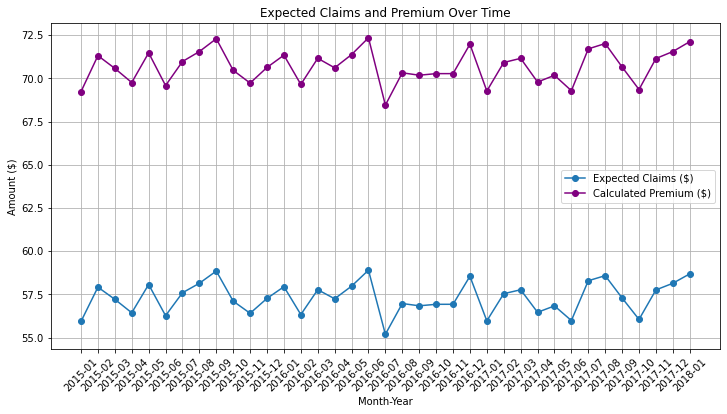

In [33]:
# Expected Claims and Premiums over Time
# Adding expected claims and premium as example values for each month
ohe_data['month_year'] = ohe_data['order date (DateOrders)'].dt.to_period("M")
monthly_data = ohe_data.groupby('month_year').apply(lambda x: pd.Series({
    'expected_claims': x['late_delivery'].mean() * 100,  # Average expected claims per month
    'calculated_premium': ((x['late_delivery'].mean() * 100 + fixed_expense) * (1 + profit_premium))
})).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month_year'].astype(str), monthly_data['expected_claims'], label='Expected Claims ($)', marker='o')
plt.plot(monthly_data['month_year'].astype(str), monthly_data['calculated_premium'], label='Calculated Premium ($)', marker='o', color='purple')
plt.xticks(rotation=45)
plt.title("Expected Claims and Premium Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid()
plt.show()

# Expected Claims: $55.84

- This value represents the average amount the insurance company expects to pay out in claims per policyholder due to late deliveries.
- So on average, for every insurance policy, the company anticipates having to pay out about $55.84 when considering the likelihood of claims.

# Calculated Premium: $69.13

- This is the premium that the insurance company should charge each policyholder to cover the expected claims, fixed expenses, and profit loading.
- The calculation includes:
- Expected Claims ($55.84): The anticipated payout for each policyholder.
- Fixed Expense ($10): A constant cost incurred for every policy sold, regardless of whether a claim is made.
- Profit Premium (5%): An additional charge added to ensure the company makes a profit.

The calculated premium of $69.13 is higher than the expected claims of $55.84. This shows that the insurance company is pricing the policy appropriately to cover potential payouts while also making a profit